In [517]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import torch.nn as nn
import os
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns
import warnings
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pylab import mpl, plt
import matplotlib.patches as mpatches
from tqdm.notebook import tqdm

# best font and style settings for notebook 
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = 'MiSans'




In [494]:
import os


def file_list(file_path):
    """
    返回 file_path 目录下所有 .csv 文件的完整路径列表（递归子目录）
    """
    csv_files = []
    for root, dirs, files in os.walk(file_path):
        for file in files:
            if file.endswith(".csv"):
                full_path = os.path.join(root, file)
                csv_files.append(full_path)
    return csv_files


In [495]:
import os


def extract_model_and_step(file_path):
    # 绝对路径规整（可选）
    file_path = os.path.normpath(file_path)

    # 提取文件名和上层文件夹名
    file_name = os.path.basename(file_path)  # e.g., answer_step_0.csv
    model_name = os.path.basename(os.path.dirname(file_path))  # e.g., 1_7B

    # 提取 step 后缀数字
    if "step_" in file_name:
        step = file_name.split("step_")[-1].split(".")[0]
    else:
        step = "unknown"

    return model_name, step


# 示例调用
model, step = extract_model_and_step("./eval_result/1_7B/answer_step_0.csv")
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0


模型名: 1_7B
Step: 0


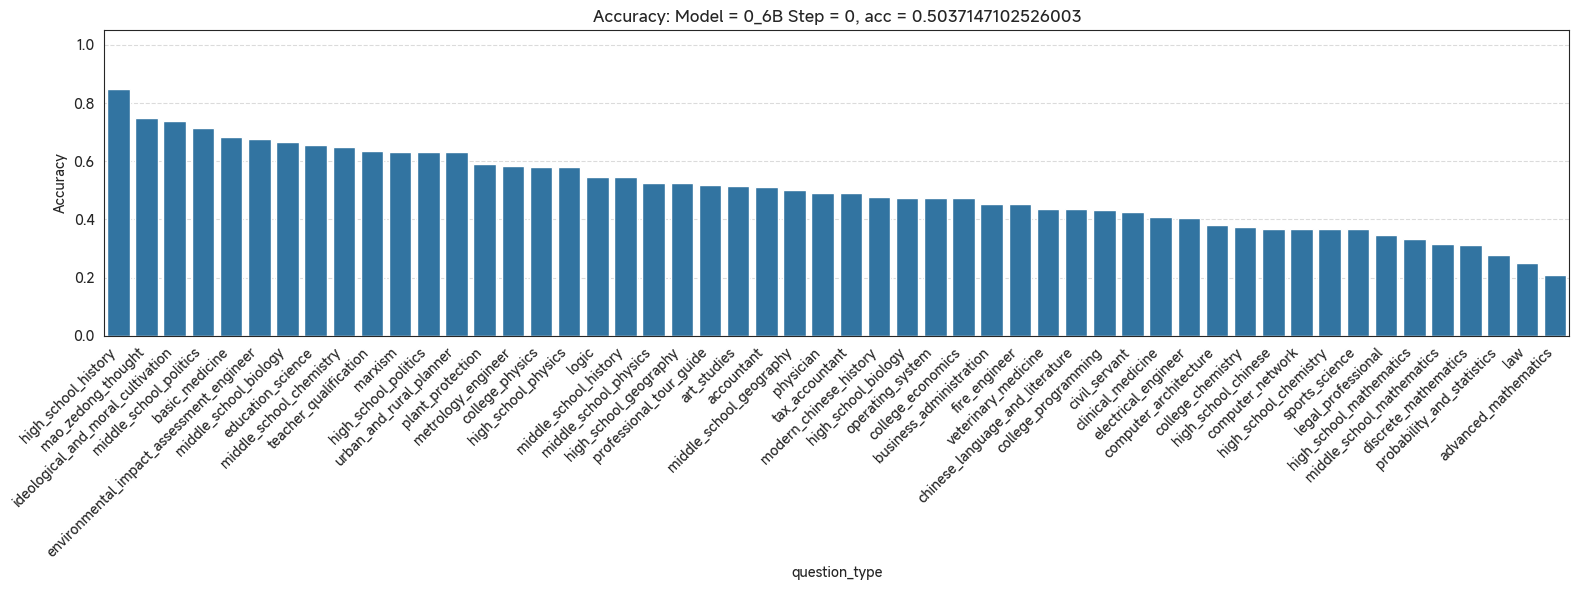

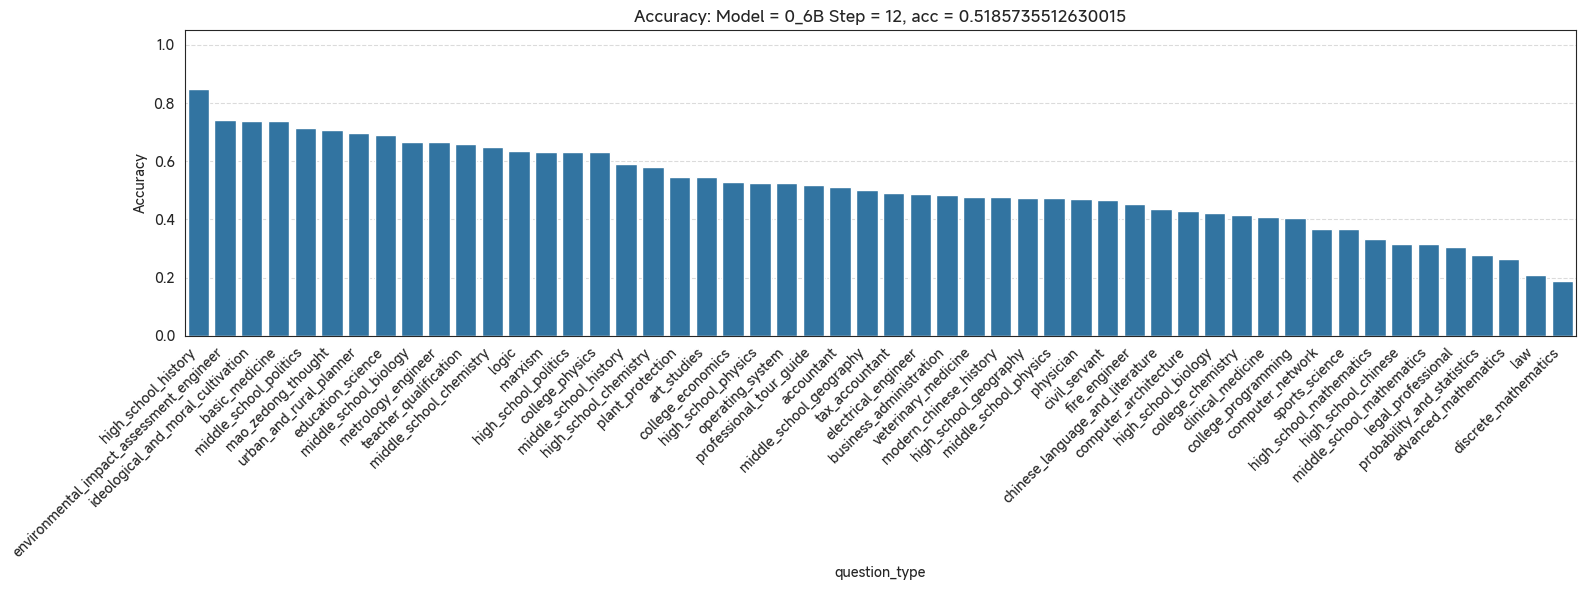

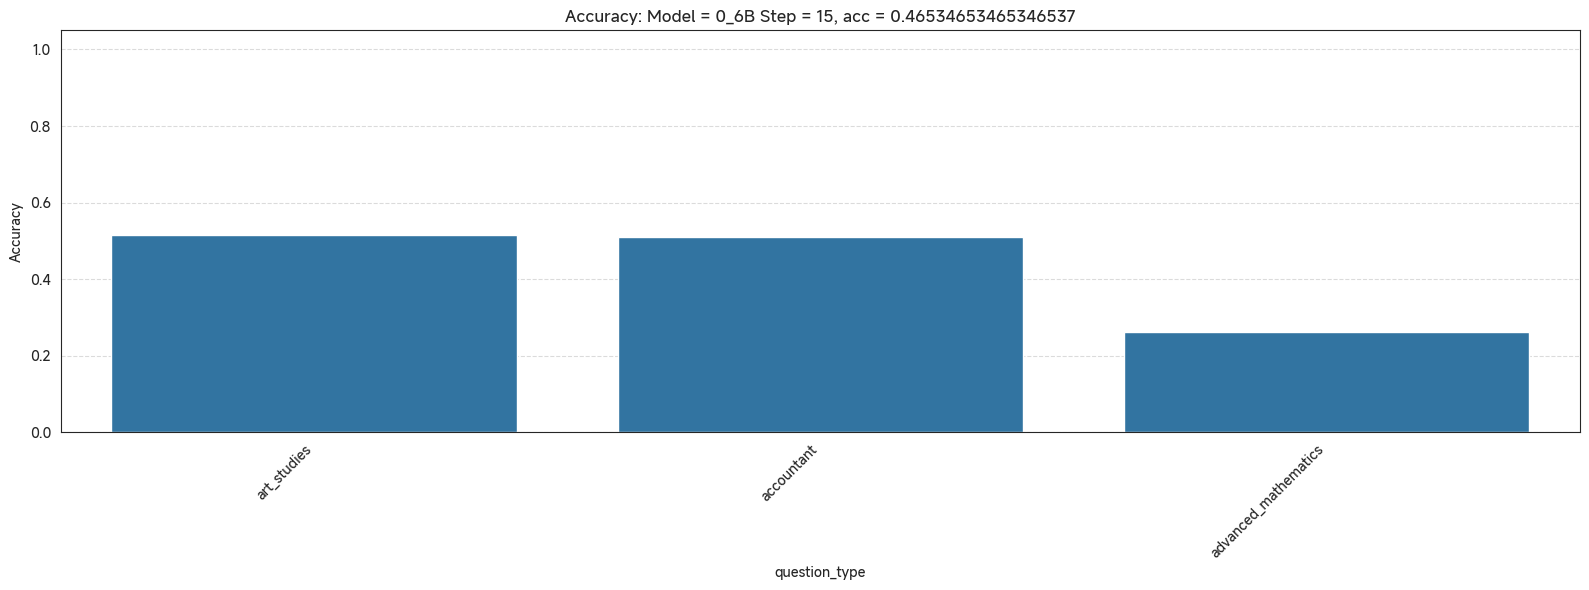

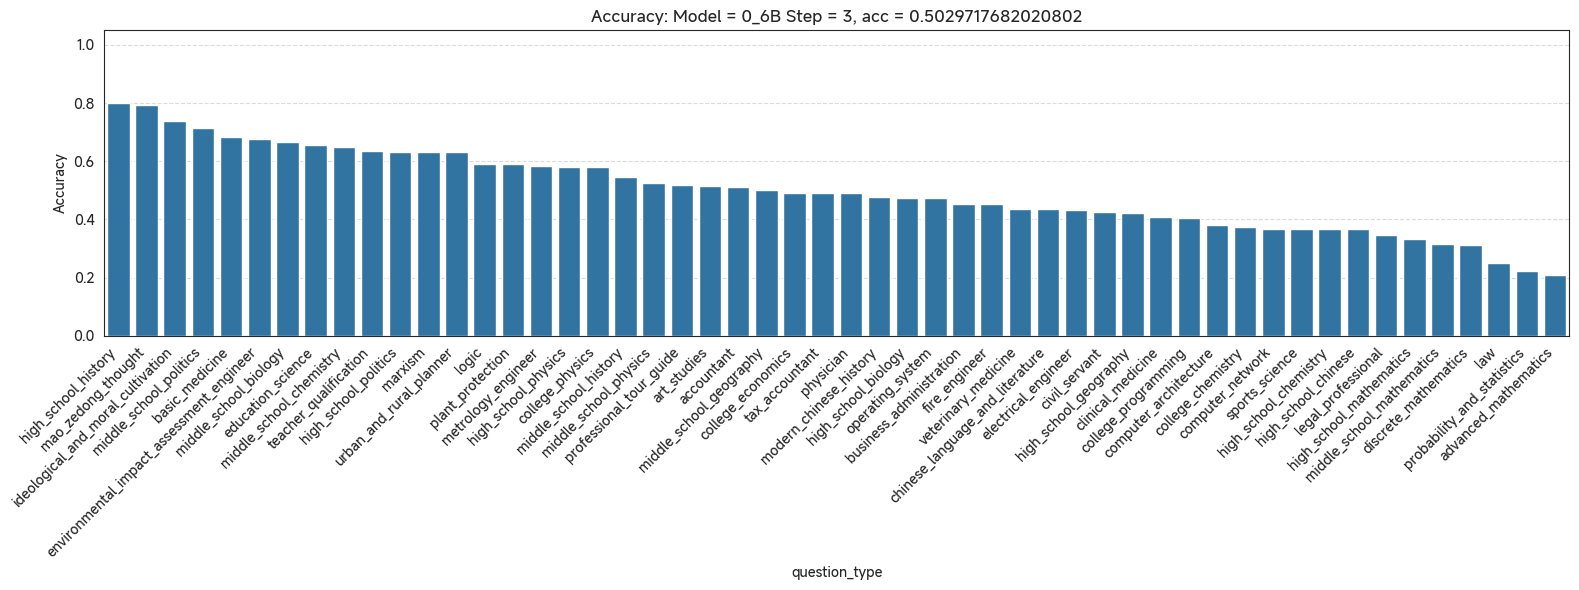

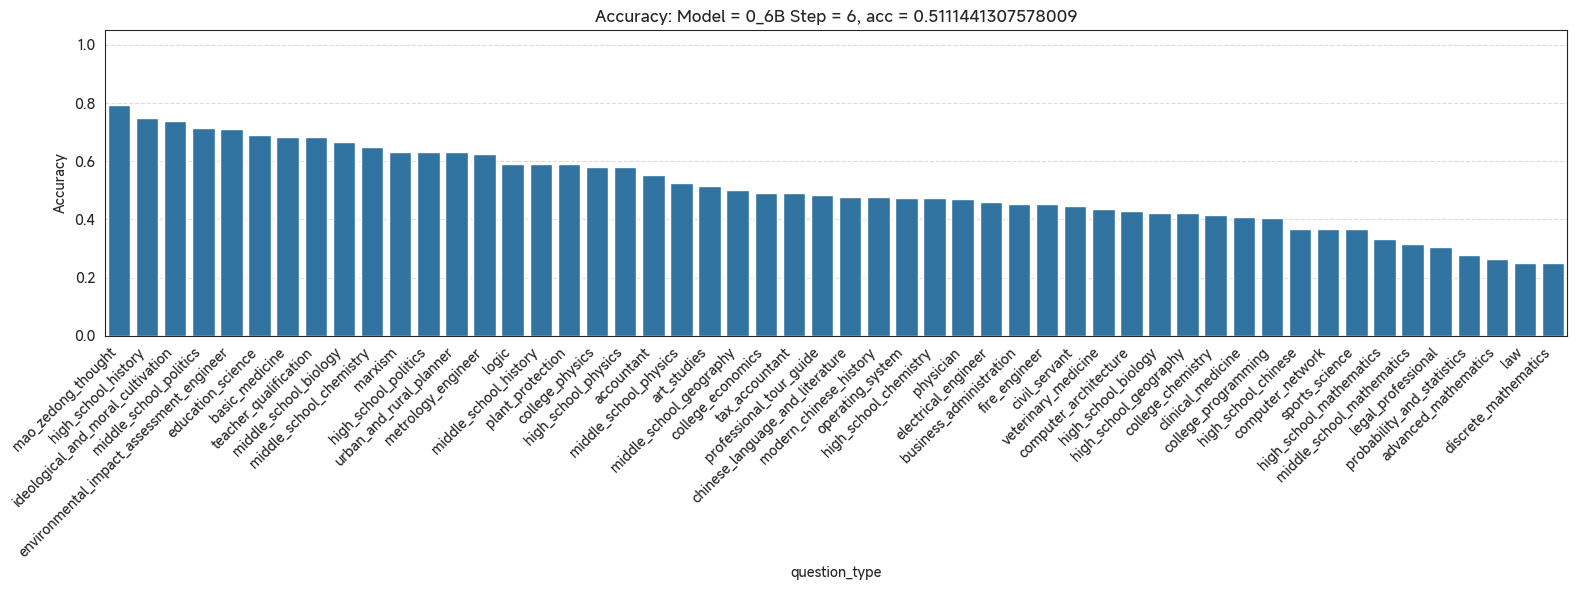

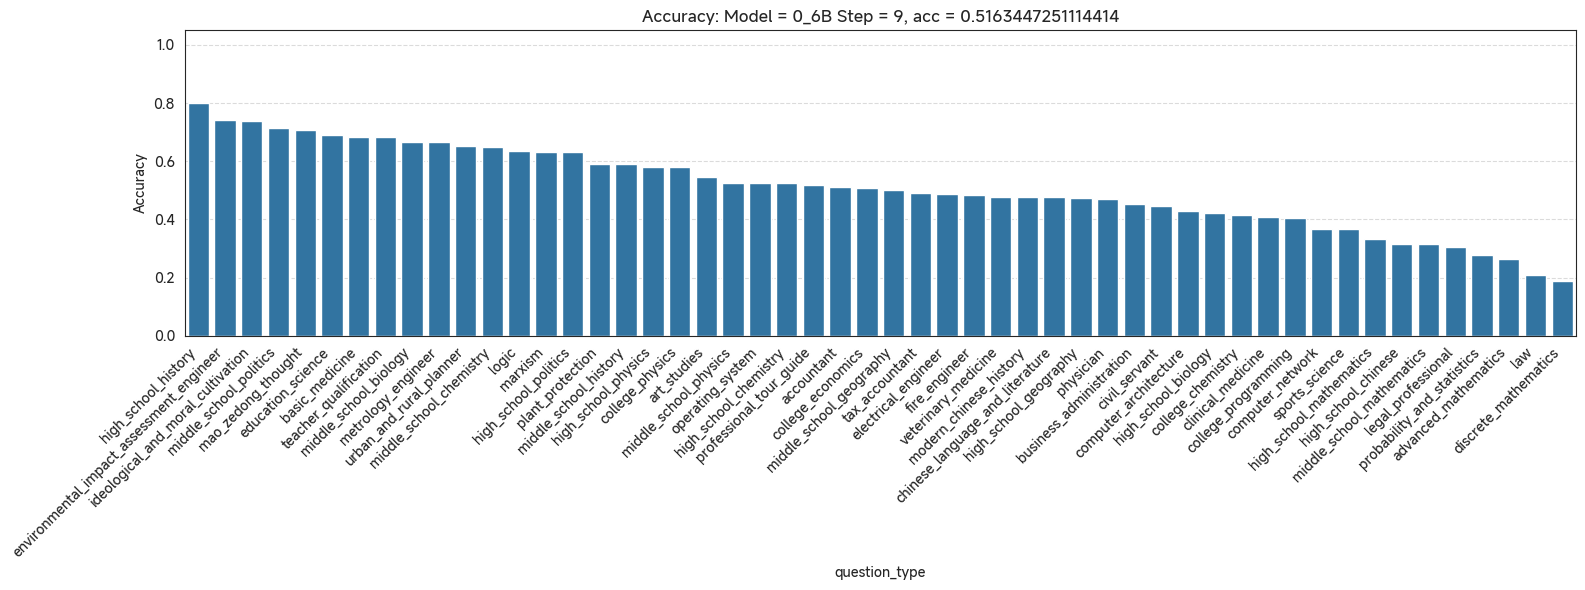

In [576]:
for df_path in file_list("./eval_result/0_6B"):
    # 示例调用
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path).iloc[::]
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    # 分组统计正确率
    acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
    acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
    acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
    acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

    acc_all = df['is_correct'].sum() / len(df)

    # 可视化
    plt.figure(figsize=(16, 6))
    sns.barplot(x="question_type", y="accuracy", data=acc_df)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
    plt.ylim(0, 1.05)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    acc_df

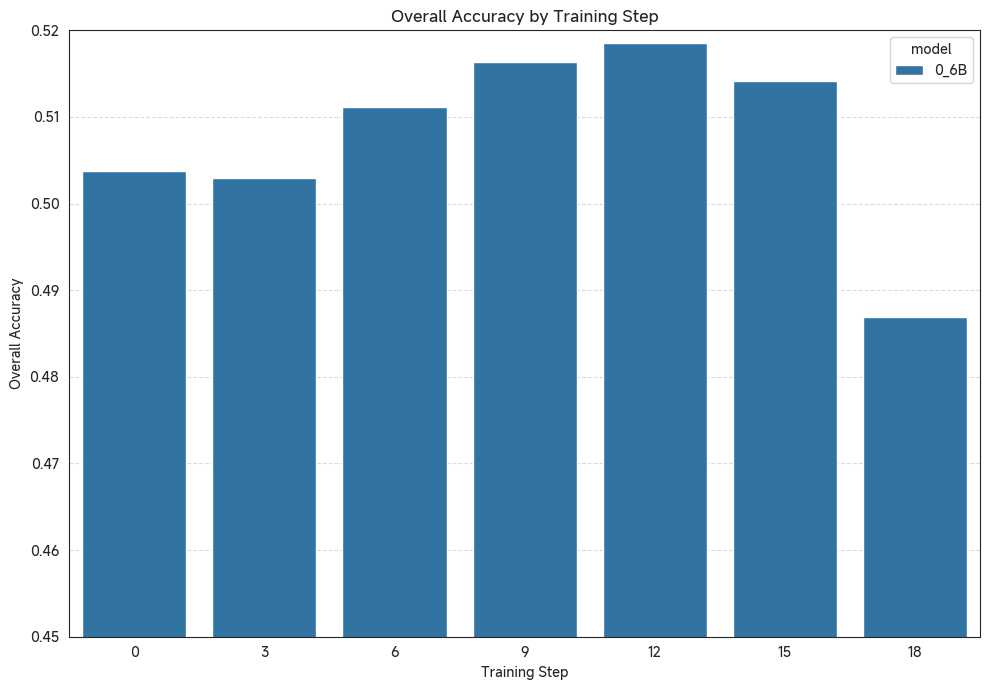

   step  accuracy model
0     0  0.503715  0_6B
1    12  0.518574  0_6B
2    15  0.514116  0_6B
3    18  0.486880  0_6B
4     3  0.502972  0_6B
5     6  0.511144  0_6B
6     9  0.516345  0_6B


In [704]:
# --- Code for plotting step vs. acc ---

# Store results for the step vs. accuracy plot

all_steps_acc = []

for df_path in file_list("./eval_result/0_6B"):
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path).iloc[::]
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    # Calculate overall accuracy
    acc_all = df['is_correct'].sum() / len(df)

    # Store the step and accuracy for the final plot
    all_steps_acc.append({"step": step, "accuracy": acc_all, "model": model})

# Convert to DataFrame for easier plotting
steps_acc_df = pd.DataFrame(all_steps_acc)
steps_acc_df['step'] = steps_acc_df['step'].astype(int)
# --- Visualize step vs. acc ---
plt.figure(figsize=(10, 7))
sns.barplot(x="step", y="accuracy", hue="model", data=steps_acc_df)  # Use hue if you have multiple models
plt.xlabel("Training Step")
plt.ylabel("Overall Accuracy")
plt.title("Overall Accuracy by Training Step")
plt.ylim(0.45, 0.52)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(steps_acc_df)

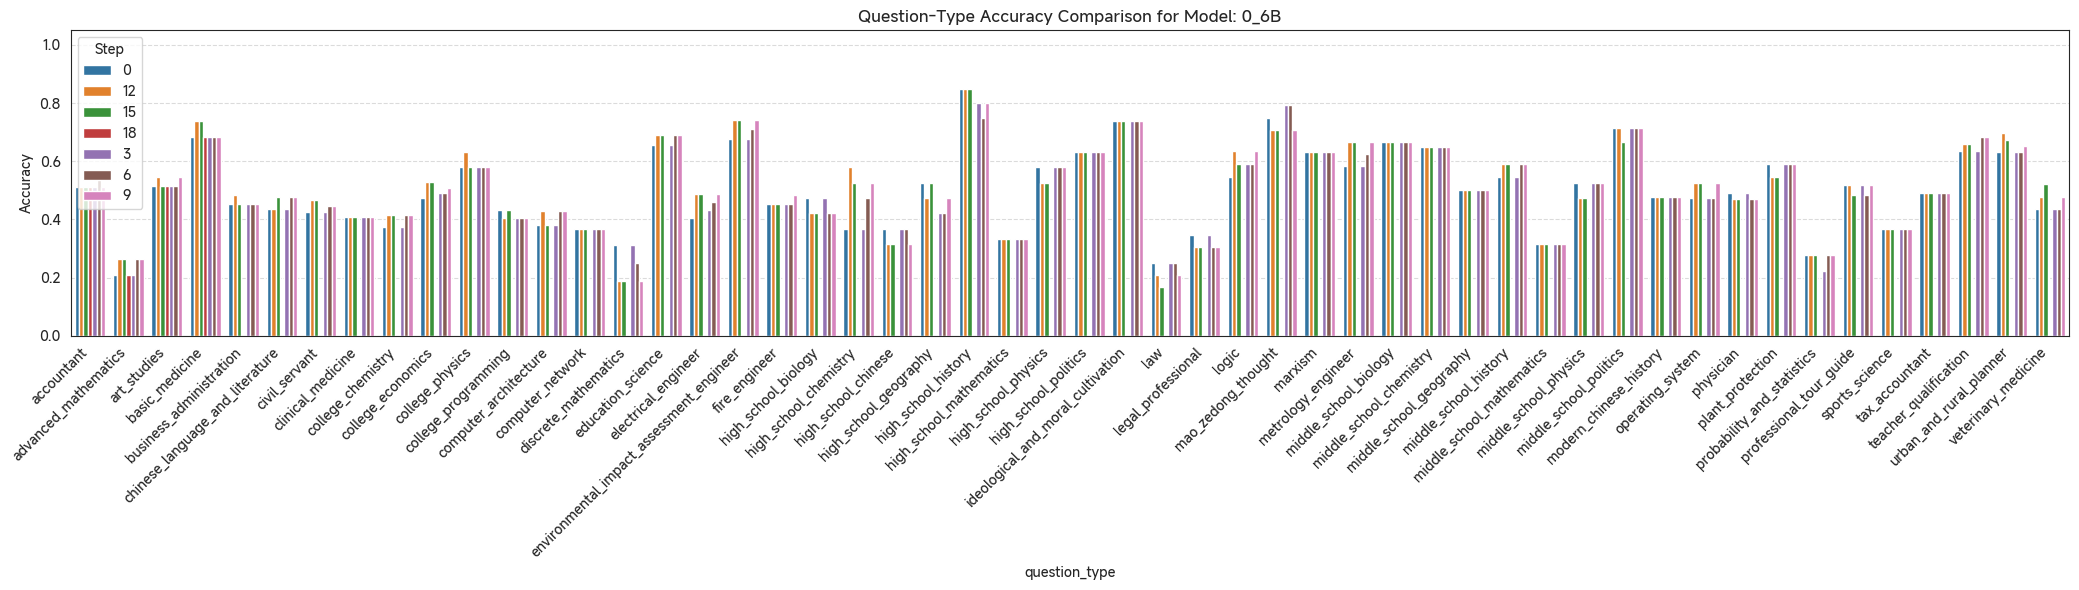

In [677]:
# 🔄 收集所有数据
records = []

for df_path in file_list("./eval_result/0_6B"):
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path)
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
    acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
    acc_df = acc_df.reset_index()

    acc_df["model"] = model
    acc_df["step"] = step

    records.append(acc_df)

# 📊 合并所有 step 的准确率数据
all_acc_df = pd.concat(records, ignore_index=True)

# ✅ 在同一张图上绘制
plt.figure(figsize=(21, 6))
sns.barplot(
    data=all_acc_df,
    x="question_type", y="accuracy", hue="step"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Question-Type Accuracy Comparison for Model: {model}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Step")
plt.tight_layout()
plt.show()

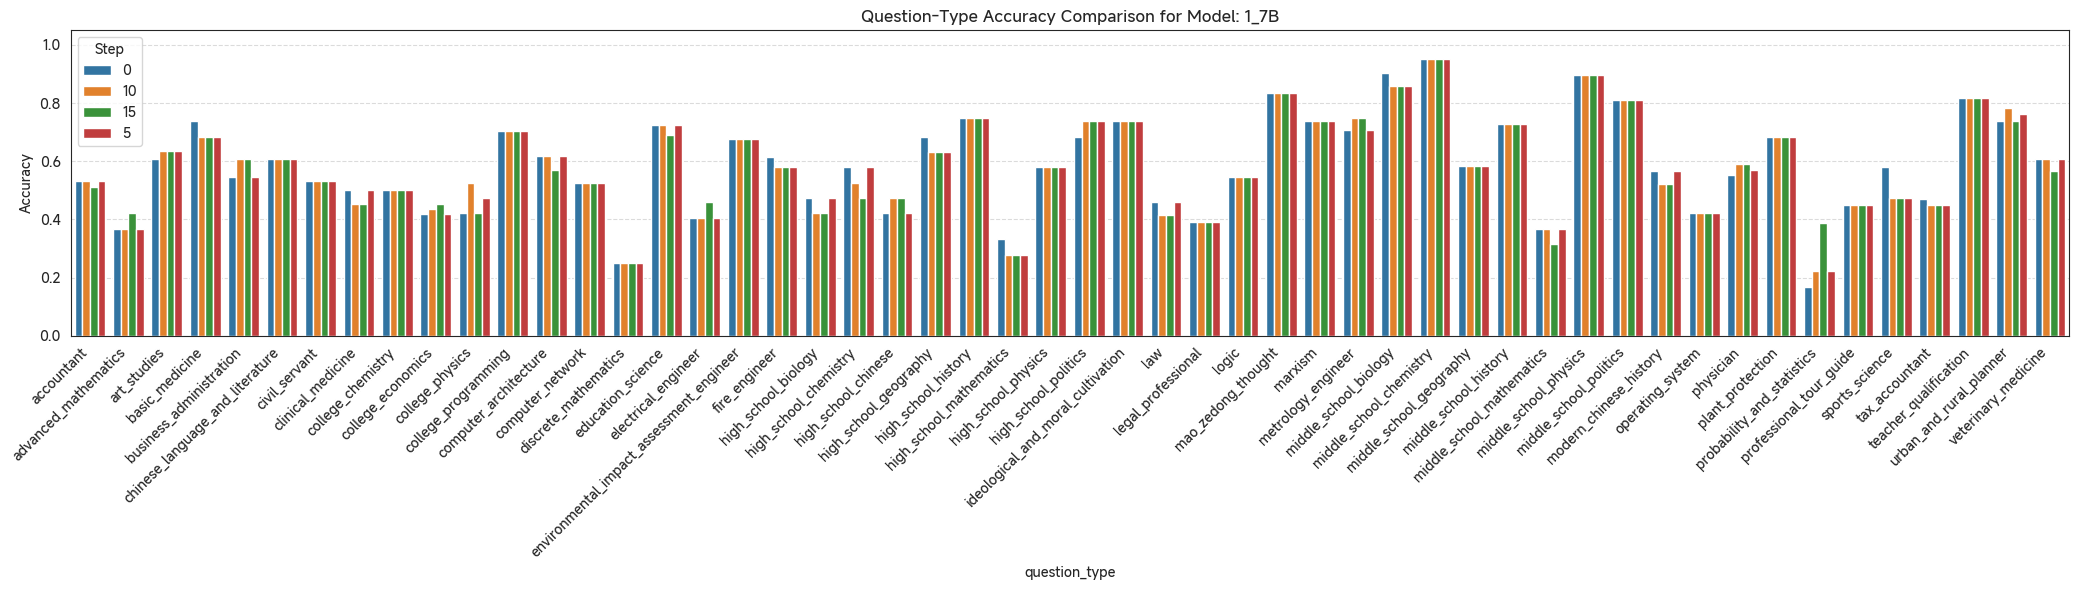

In [515]:
# 🔄 收集所有数据
records = []

for df_path in file_list("./eval_result/1_7B"):
    model, step = extract_model_and_step(df_path)
    df = pd.read_csv(df_path)
    df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

    acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
    acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
    acc_df = acc_df.reset_index()

    acc_df["model"] = model
    acc_df["step"] = step

    records.append(acc_df)

# 📊 合并所有 step 的准确率数据
all_acc_df = pd.concat(records, ignore_index=True)

# ✅ 在同一张图上绘制
plt.figure(figsize=(21, 6))
sns.barplot(
    data=all_acc_df,
    x="question_type", y="accuracy", hue="step"
)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Question-Type Accuracy Comparison for Model: {model}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Step")
plt.tight_layout()
plt.show()

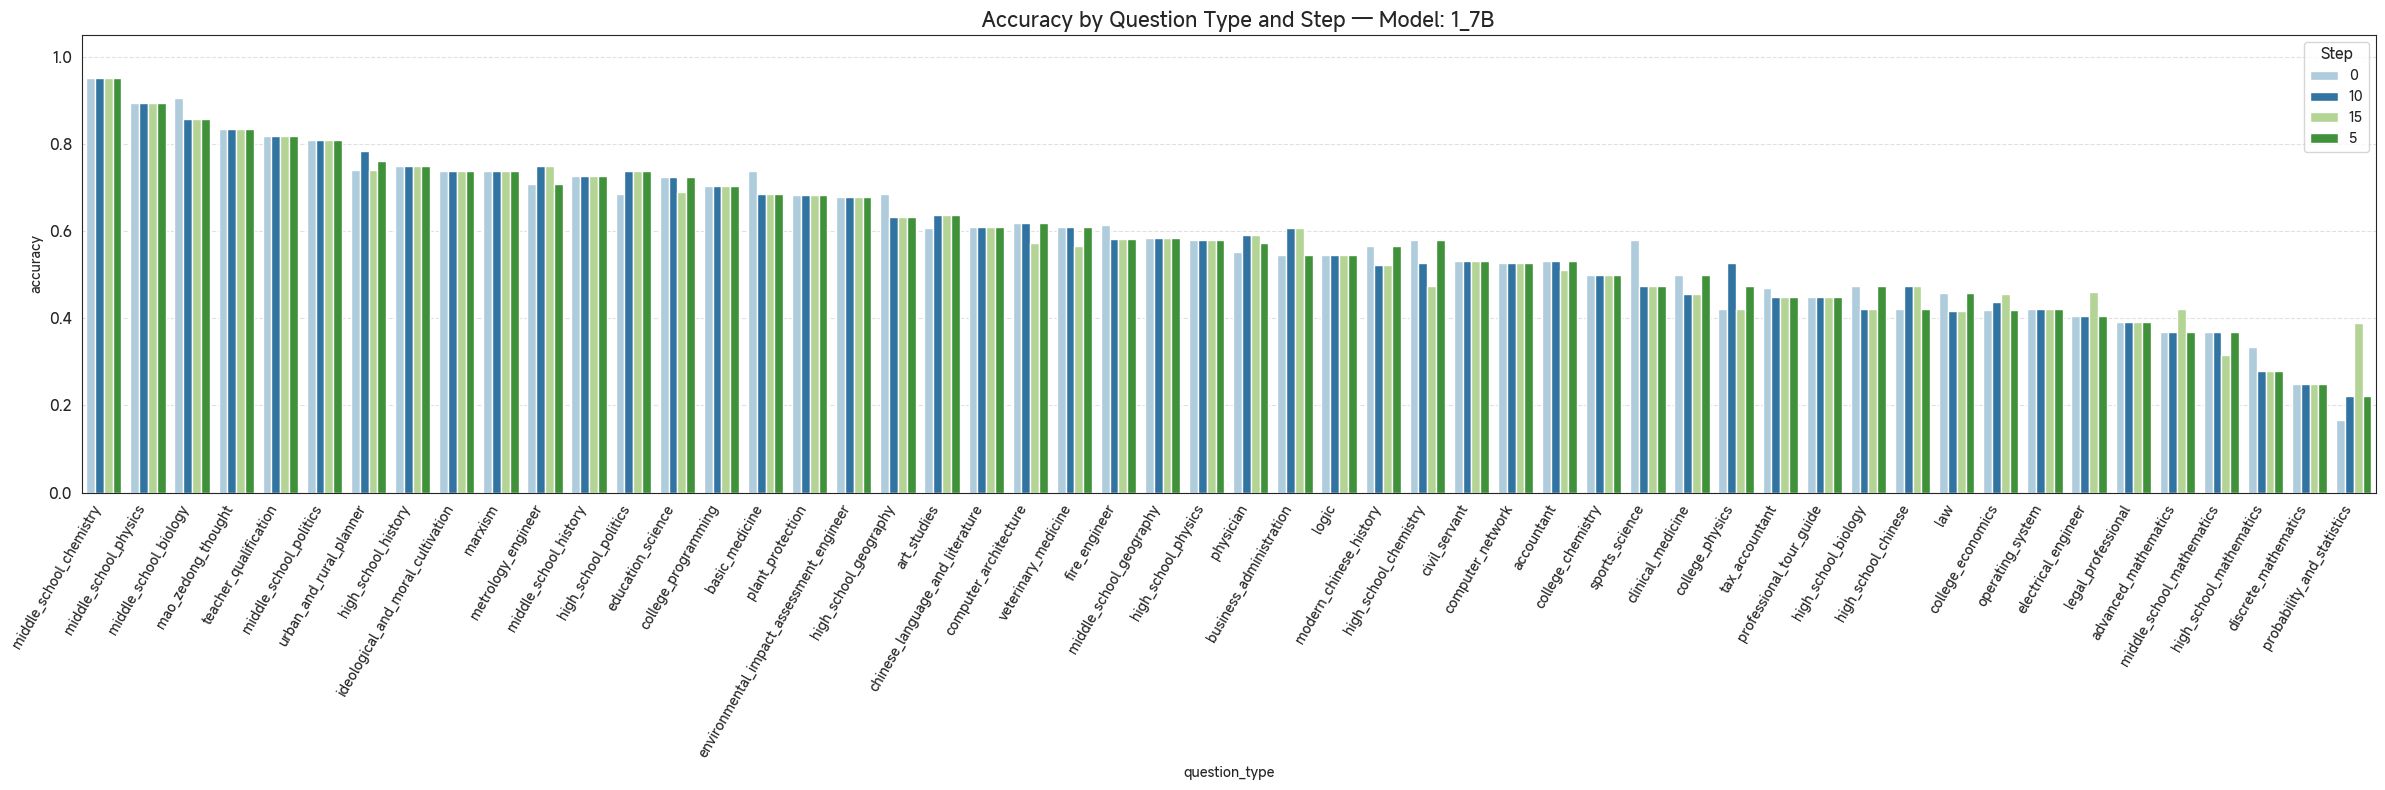

In [499]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔄 原始数据处理保持不变

# ✅ 美化绘图
plt.figure(figsize=(24, 8))

# 🔃 排序（可选：按平均准确率排序）
order = all_acc_df.groupby("question_type")["accuracy"].mean().sort_values(ascending=False).index.tolist()

sns.barplot(
    data=all_acc_df,
    x="question_type", y="accuracy",
    hue="step",
    order=order,
    palette="Paired"  # 或 "Set2", "tab20"
)

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=11)
plt.title(f"📊 Accuracy by Question Type and Step — Model: {model}", fontsize=15)

plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Step", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


模型名: 1_7B
Step: 0


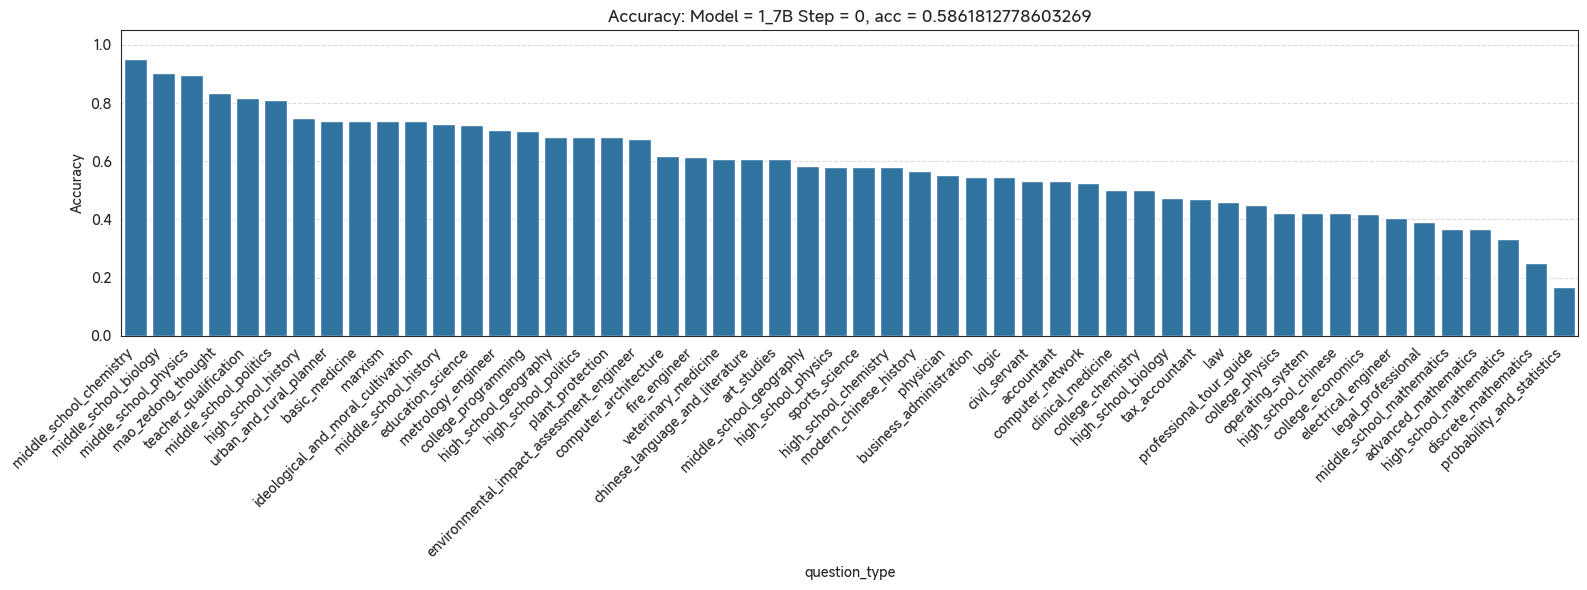

0.5861812778603269


,question_type,total_questions,correct_answers,accuracy
0,middle_school_chemistry,20,19,0.950000
1,middle_school_biology,21,19,0.904762
2,middle_school_physics,19,17,0.894737
3,mao_zedong_thought,24,20,0.833333
4,teacher_qualification,44,36,0.818182
5,middle_school_politics,21,17,0.809524
6,high_school_history,20,15,0.750000
7,urban_and_rural_planner,46,34,0.739130
8,basic_medicine,19,14,0.736842
9,marxism,19,14,0.736842


In [500]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_0.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

In [501]:
# 读取数据

df_path = "./eval_result/1_7B_3/answer_step_0.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

模型名: 1_7B_3
Step: 0


FileNotFoundError: [Errno 2] No such file or directory: './eval_result/1_7B_3/answer_step_0.csv'

In [ ]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_3.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

In [ ]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_6.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

In [ ]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_9.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

In [ ]:
# 读取数据

df_path = "./eval_result/1_7B/answer_step_12.csv"

# 示例调用
model, step = extract_model_and_step(df_path)
print("模型名:", model)  # 输出: 1_7B
print("Step:", step)  # 输出: 0

df = pd.read_csv(df_path)
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy: Model = {model} Step = {step}, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(acc_all)
acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_0.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 0, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_1.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 1, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df


In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_3.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 读取 Step=0 的数据
df0 = pd.read_csv("./eval_result/answer_step_0.csv")
df0.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]
acc_df0 = df0.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df0["accuracy"] = acc_df0["sum"] / acc_df0["count"]
acc_df0.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df0 = acc_df0.reset_index()
acc_df0["step"] = 0

# 读取 Step=20 的数据
df20 = pd.read_csv("./eval_result/answer_step_20.csv")
df20.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]
acc_df20 = df20.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df20["accuracy"] = acc_df20["sum"] / acc_df20["count"]
acc_df20.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df20 = acc_df20.reset_index()
acc_df20["step"] = 20

# 合并数据用于对比绘图
acc_compare_df = pd.concat([acc_df0[["question_type", "accuracy", "step"]],
                            acc_df20[["question_type", "accuracy", "step"]]])

# 绘制对比柱状图
plt.figure(figsize=(18, 6))
sns.barplot(data=acc_compare_df, x="question_type", y="accuracy", hue="step")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy by Question Type: Step=0 vs Step=20")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_10.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_3.csv")
df.columns = ["question", "answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result2/answer_step_3.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 3, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

acc_df

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_6.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 6, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_10.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 10, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_20.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 20, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_30.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 30, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 读取数据
df = pd.read_csv("./eval_result/answer_step_0.csv")
df.columns = ["answer", "answer_option", "option", "is_correct", "question_type"]

# 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]
acc_df = acc_df.sort_values(by="accuracy", ascending=False).reset_index()

acc_all = df['is_correct'].sum() / len(df)

# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title(f"Accuracy by Question Type: Step = 0, acc = {acc_all}")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
acc_df

In [ ]:
# 可视化
plt.figure(figsize=(16, 6))
sns.barplot(x="question_type", y="accuracy", data=acc_df)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy by Question Type")
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 按 question_type 分组统计正确率
acc_df = df.groupby("question_type")["is_correct"].agg(["count", "sum"])
acc_df["accuracy"] = acc_df["sum"] / acc_df["count"]

# 重命名列更直观
acc_df.columns = ["total_questions", "correct_answers", "accuracy"]

# 显示结果
print(acc_df)